In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
input_data = 'data00/14.csv'

In [3]:
original_data = pd.read_csv(input_data)
original_data.shape

(780, 4)

In [4]:
#original_data = original_data.iloc[:100,:]
#original_data.shape

In [5]:
split_count = 4
input_length = int(original_data.shape[0]/split_count)

In [6]:
data_array = []
for i in range(0, split_count):
    data_array.append(original_data.iloc[i*input_length : input_length*(i+1), :])

In [7]:
x = []
y = []
for i in range(0, split_count):
    close = data_array[i]['close']
    smallest=close.nsmallest(n=1)
    x.append(smallest.index[0])
    y.append(smallest.values[0])

In [8]:
X = np.asarray(x)
X = X.reshape(-1,1)
Y = np.asarray(y)

In [9]:
support_model = LinearRegression()
support_model.fit(X, Y)

LinearRegression()

In [10]:
support_line_count = np.asarray(range(1, original_data.shape[0]))
support_line = support_model.predict(support_line_count.reshape(-1,1))

In [11]:
x = []
y = []
for i in range(0, split_count):
    close = data_array[i]['close']
    largest=close.nlargest(n=1)
    x.append(largest.index[0])
    y.append(largest.values[0])

In [12]:
X = np.asarray(x)
X = X.reshape(-1,1)
Y = np.asarray(y)

In [13]:
resistance_model = LinearRegression()
resistance_model.fit(X, Y)

LinearRegression()

In [14]:
resistance_line_count = np.asarray(range(1, original_data.shape[0]))
resistance_line = resistance_model.predict(resistance_line_count.reshape(-1,1))

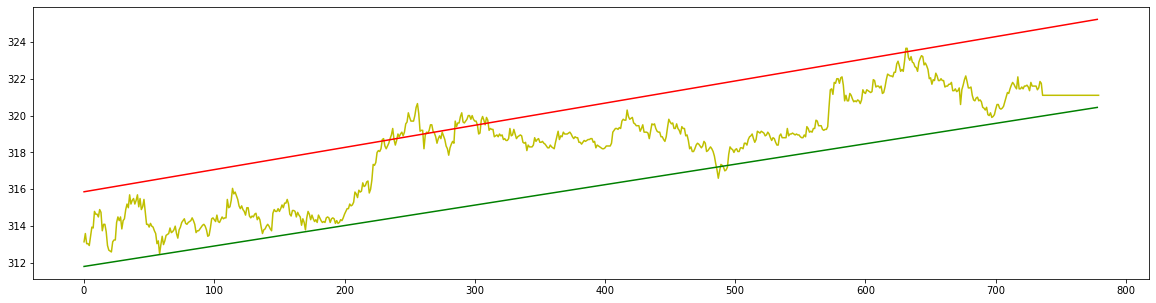

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(original_data['close'], c='y')

plt.plot(resistance_line, c='r')
plt.plot(support_line, c='g')

In [16]:
support_model.predict([[600]])

array([318.45781437])

In [17]:
resistance_model.predict([[600]])

array([323.06839208])